In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1、单变量线性回归

### 1.1 导入数据

In [32]:
data1 = pd.read_table('ex1data1.txt',sep=',',header=None).values
x = data1[:, 0:1]    # (47, 1)
y = data1[:, 1:2]    # (47, 1)

### 1.2 可视化 

Text(0,0.5,'y')

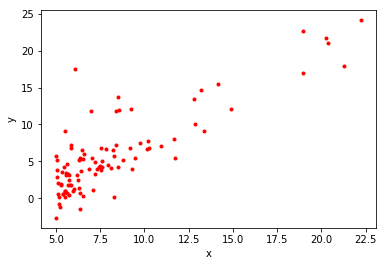

In [36]:
plt.plot(x, y, 'r.')
plt.xlabel('x')
plt.ylabel('y')

### 1.3 求解假设函数

In [39]:
def h(theta):
    '''计算假设函数'''
    return np.dot(X, theta)   # X.shape=(m,n),theta.shape=(n,1)，h.shape=(m,1)

def j(theta):    
    '''计算损失函数'''
    return 1/(2*m) * np.sum((h(theta) - y)**2)

def gradient(theta, alpha, n):
    '''梯度下降求解theta'''
    costs = []
    
    for i in range(n):
        costs.append(j(theta))
        theta = theta - alpha/m * np.dot(X.T, h(theta)-y)
        # for k in range(len(theta)): theta[k] = theta[k] - alpha/m * np.sum((h(theta)-y) * (X[:, k:k+1]))
    return theta, costs

In [45]:
X = np.insert(x, 0, 1, 1)
theta = np.zeros((2,1))

theta = gradient(theta, 0.01, 1500)[0]
costs = gradient(theta, 0.01, 1500)[1]

### 1.4 可视化梯度下降以及线性回归模型

Text(0,0.5,'Cost')

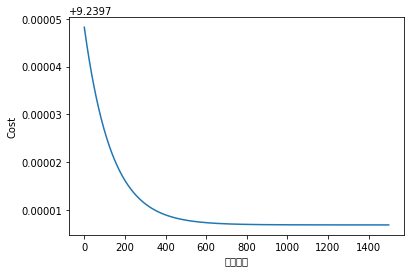

In [63]:
plt.plot(np.arange(1500), costs)
plt.xlabel('迭代次数')
plt.ylabel('Cost')

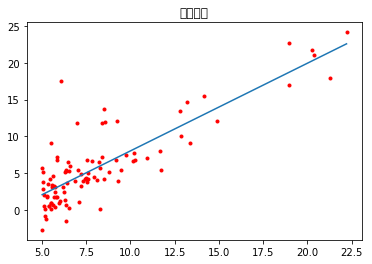

In [68]:
x_model = np.array([np.min(x), np.max(x)]) # array([ 5.0269, 22.203 ])
theta # array([[-3.88094385], [ 1.1915431 ]])
y_model = np.array([float(theta[0])+np.min(x)*float(theta[1]), float(theta[0])+np.max(x)*float(theta[1])])

plt.plot(x, y, 'r.')
plt.title("线性回归")
plt.plot(x_model, y_model)

## 2、多变量线性回归（数据差异大时需要归一化）

### 2.1 导入数据

In [4]:
data2 = pd.read_table('ex1data2.txt',sep=',',header=None).values	
x = data2[:, 0:2]    # (47, 2)
y = data2[:, 2:3]    # (47, 1)
X = (x-x.mean(axis=0))/x.std(axis=0)

# 由于x不同特征差别较大，因此需要归一化：
x_normalized = (x - x.mean(axis=0))/x.std(axis=0)

X = np.insert(x_normalized, 0, 1, 1)   # (47, 3) 
m = X.shape[0]   # 47

### 2.2 梯度下降求解

In [12]:
def h(theta):
    '''计算假设函数'''
    return np.dot(X, theta)   # X.shape=(m,n),theta.shape=(n,1)，h.shape=(m,1)

def j(theta):    
    '''计算损失函数'''
    return 1/(2*m) * np.sum((h(theta) - y)**2)

def gradient(theta, alpha, n):
    '''梯度下降求解theta'''
    costs = []
    
    for i in range(n):
        costs.append(j(theta))
        theta = theta - alpha/m * np.dot(X.T, h(theta)-y)
        # for k in range(len(theta)): theta[k] = theta[k] - alpha/m * np.sum((h(theta)-y) * (X[:, k:k+1]))
    return theta, costs

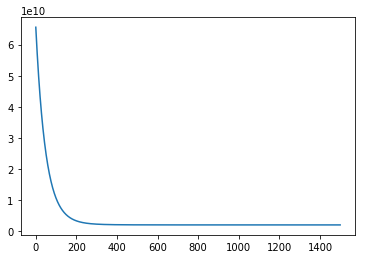

In [14]:
# 绘制代价函数
results = gradient(np.zeros((3,1)), 0.01, 1500)
plt.plot(range(1500), results[1])

In [15]:
# 求解的theta值
results[0]	# [[340412.56301439] [109371.67272252] [ -6502.3992545 ]]

array([[340412.56301439],
       [109370.05670466],
       [ -6500.61509507]])

In [22]:
# 测试新数据
x_test = np.array([1650.,3.])
x_test_normalized = ((x_test-x.mean(axis=0))/x.std(axis=0)).reshape(1,2)
X_test = np.insert(x_test_normalized, 0, 1, 1)

theta = results[0]
np.dot(X_test, b)

array([[293098.46667577]])